/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_8684/1657230876.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'][-1] = 'Batch correction'


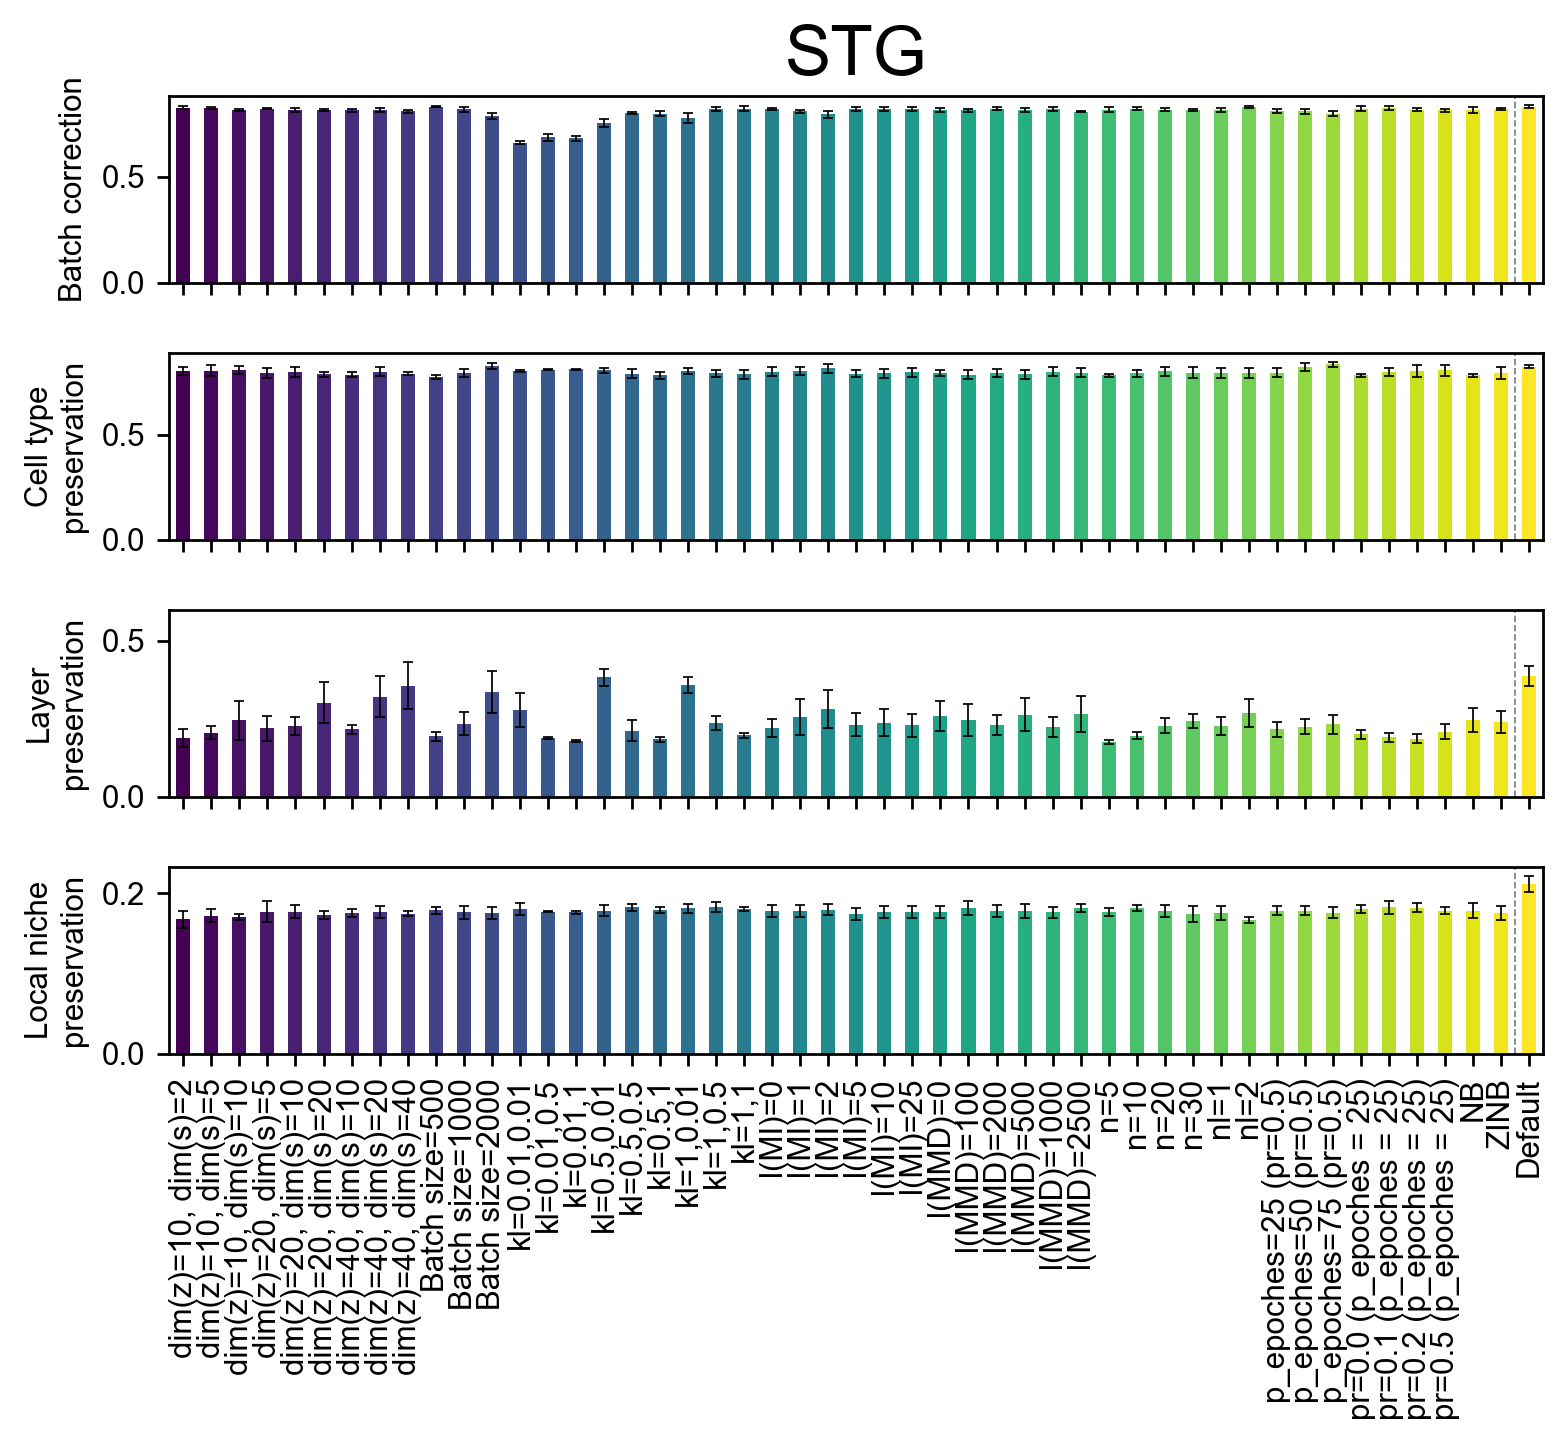

In [32]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc

## Can be any adata, used to initialize the scib-metrics object

adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)

df = pd.read_csv('settings/merfish_stg_benchmarkz_rsfixed.csv',index_col=0)

# Concat with the default setting

df = pd.concat([pd.read_csv('merfish/stg_benchmark_ct.csv',index_col=0)[['simvikl2_z'+str(i) for i in range(10)]],df],axis=1)
df = df.drop(index = ['ilisi_knn','pcr_comparison'])
bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T



df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]

## use std to better highlight the fluctuation within each setting

df_ste = df_std / 1



import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 9
fig, axs = plt.subplots(4,1,figsize=(6.5,6))



import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 14
#fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black', 
                   'capsize': 1.5,    
                   'capthick': 0.5}  

cmap = plt.get_cmap('viridis')

# generate color
colors = cmap(np.linspace(0, 1, df_mean.shape[0]))

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()
df_summary.plot.bar(x='index', y='Batch correction_x',yerr='Batch correction_y', color=colors,ax=axs[0],error_kw=error_bar_style,legend=False)
df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[1],error_kw=error_bar_style,legend=False)

df = pd.read_csv('settings/merfish_stg_benchmarks_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/stg_benchmark_niche.csv',index_col=0)[['simvikl2_s'+str(i) for i in range(10)]],df],axis=1)
df = df.drop(index = ['pcr_comparison'])
bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std /1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[2],error_kw=error_bar_style,legend=False)


df = pd.read_csv('settings/merfish_stg_benchmarks_myh11_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/stg_benchmark_myh11.csv',index_col=0)[['simvikl2_s'+str(i) for i in range(10)]],df],axis=1)
df = df.T
df['tmp'] = 0
df['tmp'][-1] = 'Batch correction'
df = df.T

bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[3],error_kw=error_bar_style,legend=False)

y_list = ['Batch correction','Cell type\npreservation','Layer\npreservation','Local niche\npreservation']
for i in range(4):
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_list[i])
    axs[i].axvline(x=47.5, color='gray', linestyle='--', linewidth=0.5)
for i in range(3):
    axs[i].set_xticklabels([])

axs[2].set_ylim((0,0.6))
axs[0].set_title('STG',fontsize=20)
plt.tight_layout()

plt.savefig('stg_tuning_new_unnormalized.pdf')

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_8684/3314726101.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'][-1] = 'Batch correction'


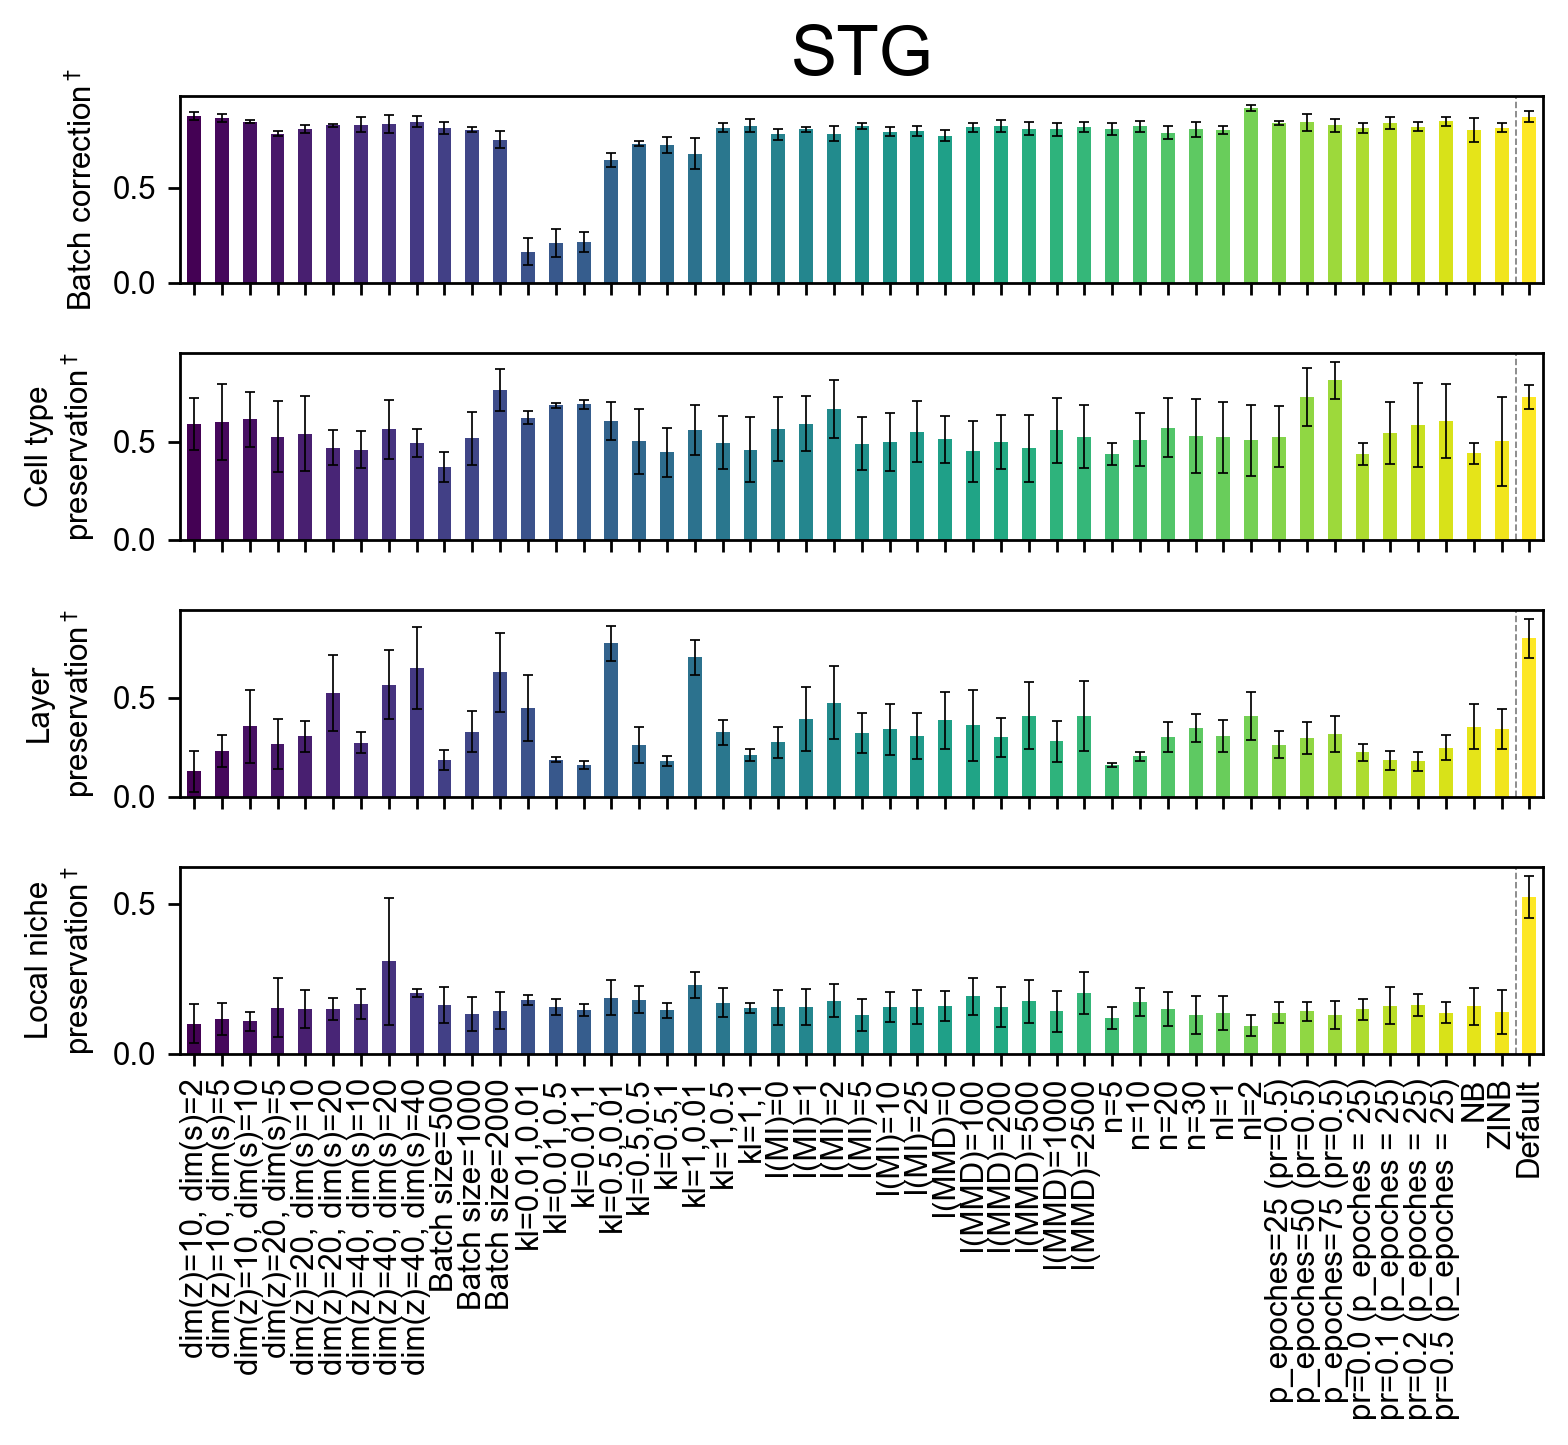

In [14]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
#adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)

df = pd.read_csv('settings/merfish_stg_benchmarkz_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/stg_benchmark_ct.csv',index_col=0)[['simvikl2_z'+str(i) for i in range(10)]],df],axis=1)
df = df.drop(index = ['ilisi_knn','pcr_comparison'])
bm._results = df
df_ = bm.get_results(min_max_scale=True).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1



import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 9
fig, axs = plt.subplots(4,1,figsize=(6.5,6))



import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 14
#fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black', 
                   'capsize': 1.5,    
                   'capthick': 0.5}  

cmap = plt.get_cmap('viridis')


colors = cmap(np.linspace(0, 1, df_mean.shape[0]))

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()
df_summary.plot.bar(x='index', y='Batch correction_x',yerr='Batch correction_y', color=colors,ax=axs[0],error_kw=error_bar_style,legend=False)
df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[1],error_kw=error_bar_style,legend=False)

df = pd.read_csv('settings/merfish_stg_benchmarks_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/stg_benchmark_niche.csv',index_col=0)[['simvikl2_s'+str(i) for i in range(10)]],df],axis=1)
bm._results = df
df_ = bm.get_results(min_max_scale=True).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std /1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[2],error_kw=error_bar_style,legend=False)


df = pd.read_csv('settings/merfish_stg_benchmarks_myh11_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/stg_benchmark_myh11.csv',index_col=0)[['simvikl2_s'+str(i) for i in range(10)]],df],axis=1)
df = df.T
df['tmp'] = 0
df['tmp'][-1] = 'Batch correction'
df = df.T

bm._results = df
df_ = bm.get_results(min_max_scale=True).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[3],error_kw=error_bar_style,legend=False)

y_list = ['Batch correction'+r'$^\dagger$','Cell type\npreservation'+r'$^\dagger$','Layer\npreservation'+r'$^\dagger$','Local niche\npreservation'+r'$^\dagger$']
for i in range(4):
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_list[i])
    axs[i].axvline(x=47.5, color='gray', linestyle='--', linewidth=0.5)
for i in range(3):
    axs[i].set_xticklabels([])

#axs[2].set_ylim((0,0.6))
axs[0].set_title('STG',fontsize=20)
plt.tight_layout()

plt.savefig('stg_tuning_new.pdf')

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_8684/1176714487.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'][-1] = 'Batch correction'


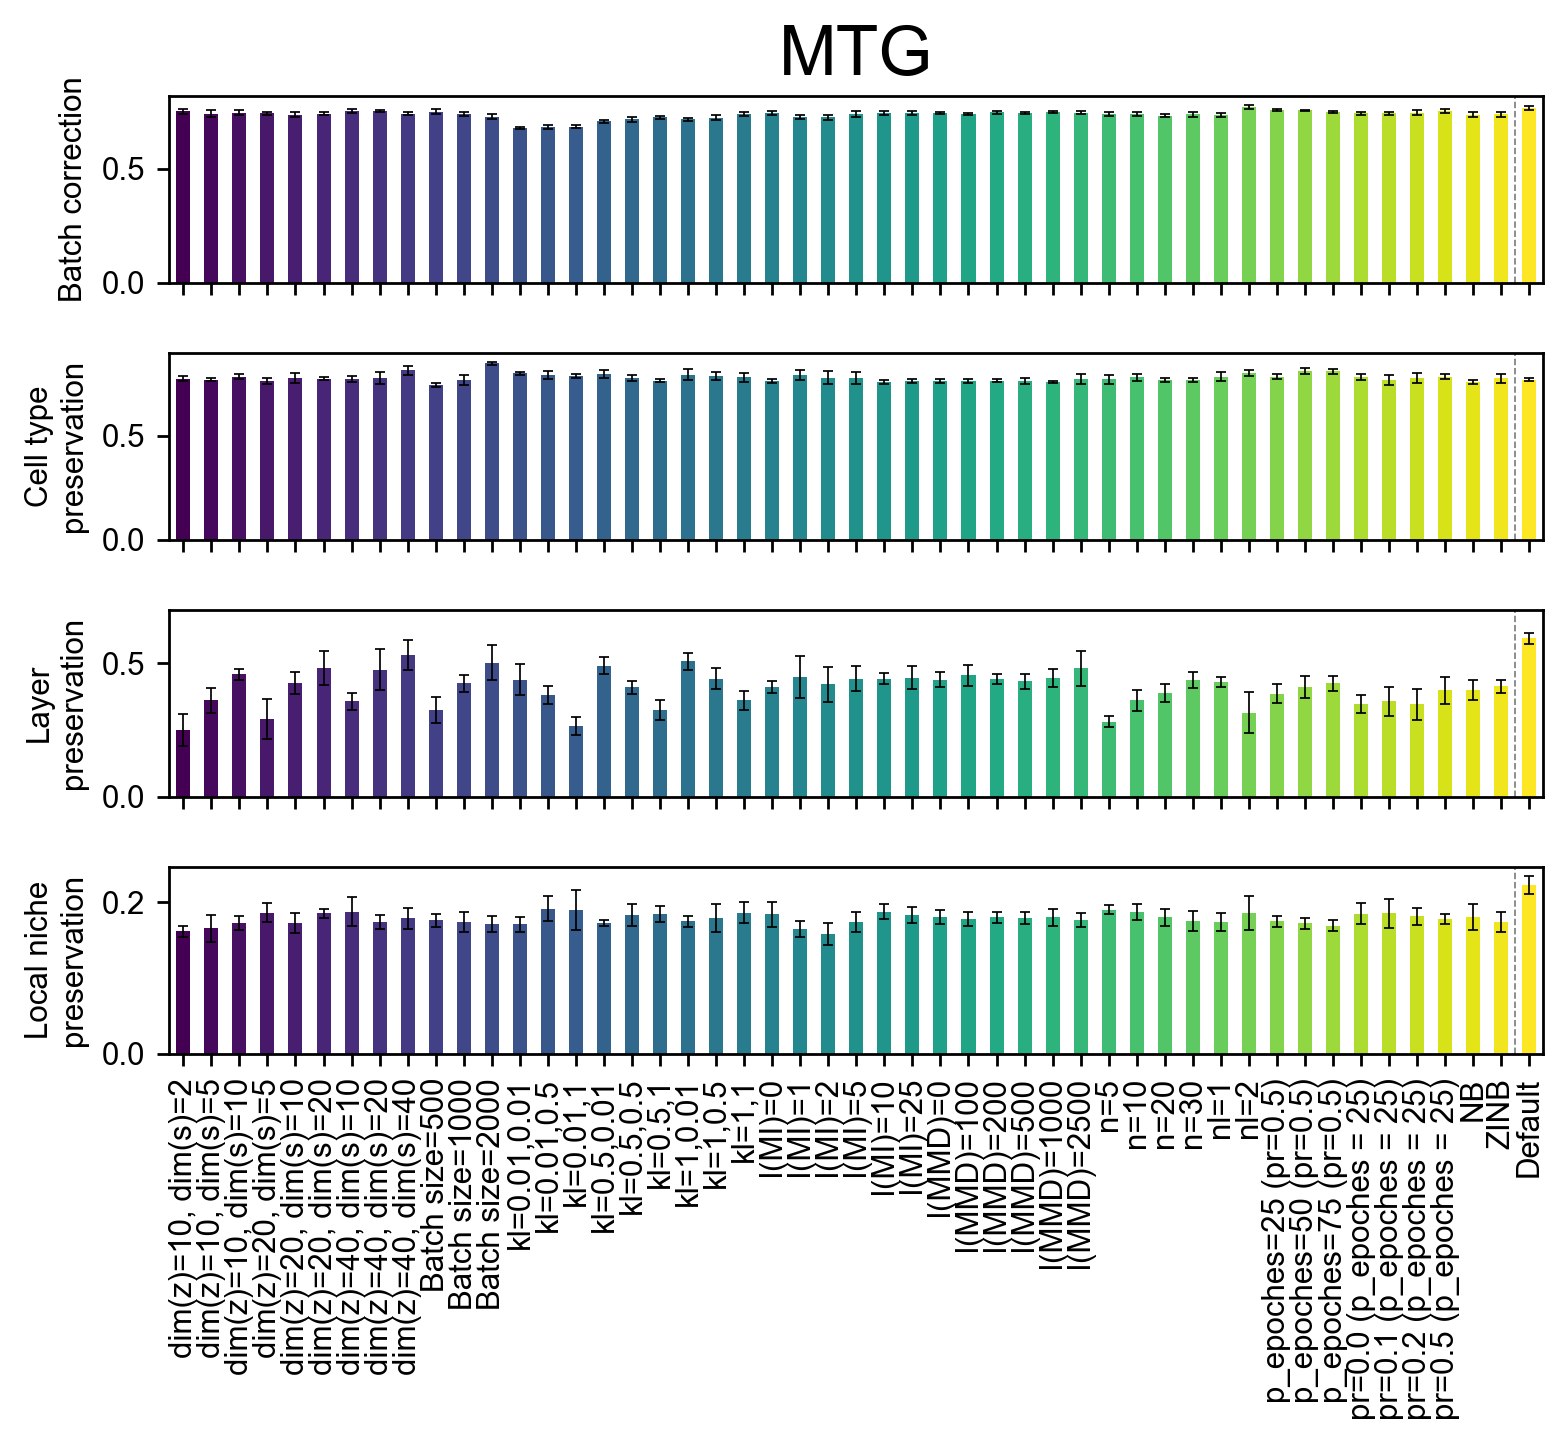

In [17]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
#adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)

df = pd.read_csv('settings/merfish_mtg_benchmarkz_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/mtg_benchmark_ct.csv',index_col=0)[['simvikl_z'+str(i) for i in range(10)]],df],axis=1)
df = df.drop(index = ['pcr_comparison'])
bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1



import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 9
fig, axs = plt.subplots(4,1,figsize=(6.5,6))



import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 14
#fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black',
                   'capsize': 1.5,    
                   'capthick': 0.5}   

cmap = plt.get_cmap('viridis')


colors = cmap(np.linspace(0, 1, df_mean.shape[0]))

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()
df_summary.plot.bar(x='index', y='Batch correction_x',yerr='Batch correction_y', color=colors,ax=axs[0],error_kw=error_bar_style,legend=False)
df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[1],error_kw=error_bar_style,legend=False)

df = pd.read_csv('settings/merfish_mtg_benchmarks_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/mtg_benchmark_niche.csv',index_col=0)[['simvikl_s'+str(i) for i in range(10)]],df],axis=1)
bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']
df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std /1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[2],error_kw=error_bar_style,legend=False)


df = pd.read_csv('settings/merfish_mtg_benchmarks_myh11_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/mtg_benchmark_myh11.csv',index_col=0)[['simvikl_s'+str(i) for i in range(10)]],df],axis=1)
df = df.T
df['tmp'] = 0
df['tmp'][-1] = 'Batch correction'
df = df.T

bm._results = df
df_ = bm.get_results(min_max_scale=False).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[3],error_kw=error_bar_style,legend=False)

y_list = ['Batch correction','Cell type\npreservation','Layer\npreservation','Local niche\npreservation']
for i in range(4):
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_list[i])
    axs[i].axvline(x=47.5, color='gray', linestyle='--', linewidth=0.5)
for i in range(3):
    axs[i].set_xticklabels([])

axs[2].set_ylim((0,0.7))
axs[0].set_title('MTG',fontsize=20)
plt.tight_layout()

plt.savefig('mtg_tuning_new_unnormalized.pdf')

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_8684/1479171758.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'][-1] = 'Batch correction'


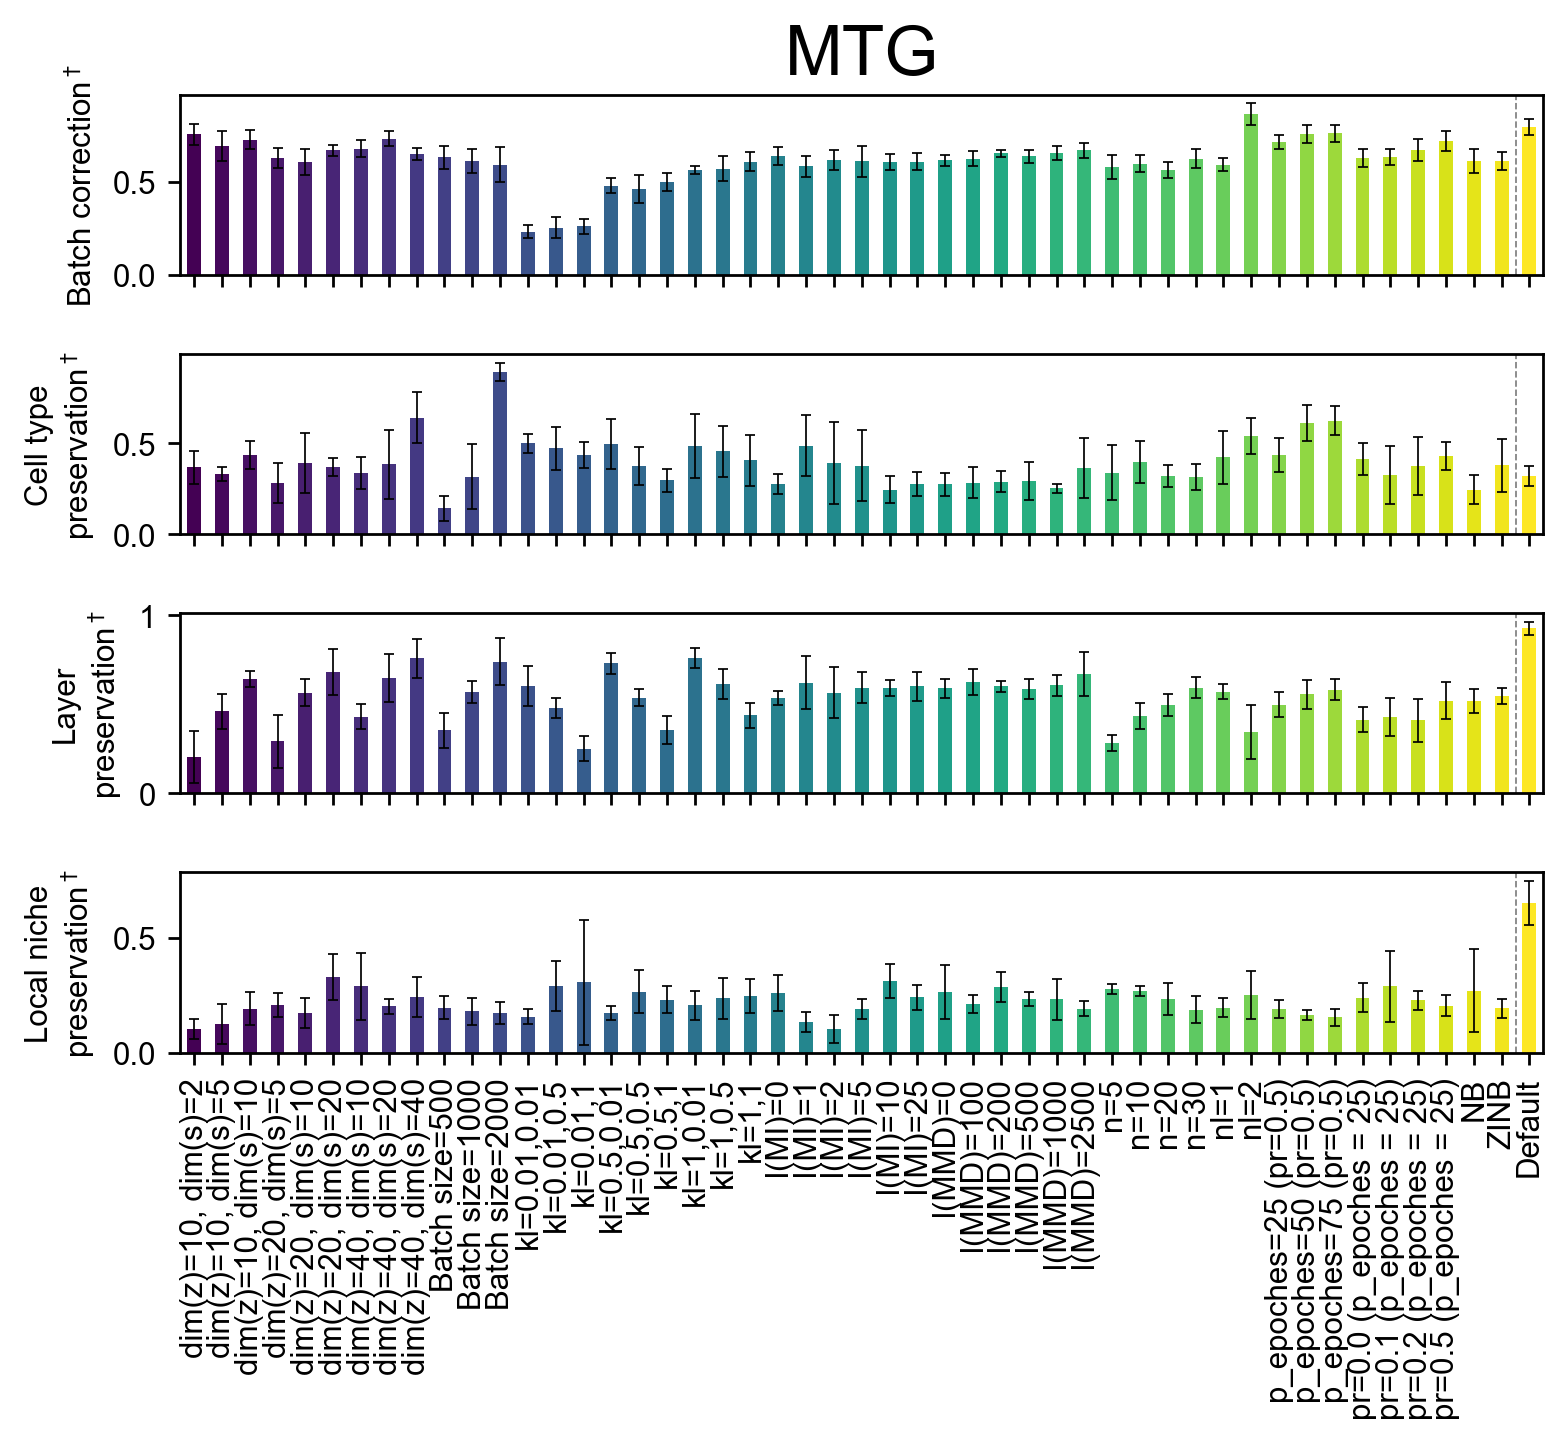

In [18]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
#adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)

df = pd.read_csv('settings/merfish_mtg_benchmarkz_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/mtg_benchmark_ct.csv',index_col=0)[['simvikl_z'+str(i) for i in range(10)]],df],axis=1)
df = df.drop(index = ['pcr_comparison'])
bm._results = df
df_ = bm.get_results(min_max_scale=True).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1



import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 9
fig, axs = plt.subplots(4,1,figsize=(6.5,6))



import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 14
#fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black', 
                   'capsize': 1.5,   
                   'capthick': 0.5}  

cmap = plt.get_cmap('viridis')

colors = cmap(np.linspace(0, 1, df_mean.shape[0]))

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()
df_summary.plot.bar(x='index', y='Batch correction_x',yerr='Batch correction_y', color=colors,ax=axs[0],error_kw=error_bar_style,legend=False)
df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[1],error_kw=error_bar_style,legend=False)

df = pd.read_csv('settings/merfish_mtg_benchmarks_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/mtg_benchmark_niche.csv',index_col=0)[['simvikl_s'+str(i) for i in range(10)]],df],axis=1)
bm._results = df
df_ = bm.get_results(min_max_scale=True).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']
df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std /1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()

df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[2],error_kw=error_bar_style,legend=False)


df = pd.read_csv('settings/merfish_mtg_benchmarks_myh11_rsfixed.csv',index_col=0)
df = pd.concat([pd.read_csv('merfish/mtg_benchmark_myh11.csv',index_col=0)[['simvikl_s'+str(i) for i in range(10)]],df],axis=1)
df = df.T
df['tmp'] = 0
df['tmp'][-1] = 'Batch correction'
df = df.T

bm._results = df
df_ = bm.get_results(min_max_scale=True).T
df_ = df_.T

df_['name'] = df_.index.str[:-1]
df_mean = df_.iloc[:-1].groupby('name').mean()
df_std = df_.iloc[:-1].groupby('name').std()

df_mean.index=['dim(z)=10, dim(s)=10','dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=20, dim(s)=5','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=1000','Batch size=2000','Batch size=500','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','l(MI)=0','l(MI)=1','l(MI)=10','l(MI)=2','l(MI)=25','l(MI)=5','l(MMD)=0','l(MMD)=100','l(MMD)=1000','l(MMD)=200','l(MMD)=2500','l(MMD)=500','n=10','n=20','n=30','n=5','nl=1','nl=2','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','pr=0.0 (p_epoches = 25)','NB','ZINB','Default']
df_std.index = df_mean.index
order = ['dim(z)=10, dim(s)=2','dim(z)=10, dim(s)=5','dim(z)=10, dim(s)=10','dim(z)=20, dim(s)=5','dim(z)=20, dim(s)=10','dim(z)=20, dim(s)=20','dim(z)=40, dim(s)=10','dim(z)=40, dim(s)=20','dim(z)=40, dim(s)=40','Batch size=500','Batch size=1000','Batch size=2000','kl=0.01,0.01','kl=0.01,0.5','kl=0.01,1','kl=0.5,0.01','kl=0.5,0.5','kl=0.5,1','kl=1,0.01','kl=1,0.5','kl=1,1','l(MI)=0','l(MI)=1','l(MI)=2','l(MI)=5','l(MI)=10','l(MI)=25','l(MMD)=0','l(MMD)=100','l(MMD)=200','l(MMD)=500','l(MMD)=1000','l(MMD)=2500','n=5','n=10','n=20','n=30','nl=1','nl=2','p_epoches=25 (pr=0.5)','p_epoches=50 (pr=0.5)','p_epoches=75 (pr=0.5)','pr=0.0 (p_epoches = 25)','pr=0.1 (p_epoches = 25)','pr=0.2 (p_epoches = 25)','pr=0.5 (p_epoches = 25)','NB','ZINB','Default']

df_mean = df_mean.loc[order]
df_std = df_std.loc[order]
df_ste = df_std / 1

df_summary = pd.merge(df_mean,df_ste,left_index=True,right_index=True)
df_summary = df_summary.reset_index()
df_summary.plot.bar(x='index', y='Bio conservation_x',yerr='Bio conservation_y', color=colors,ax=axs[3],error_kw=error_bar_style,legend=False)

y_list = ['Batch correction'+r'$^\dagger$','Cell type\npreservation'+r'$^\dagger$','Layer\npreservation'+r'$^\dagger$','Local niche\npreservation'+r'$^\dagger$']
for i in range(4):
    axs[i].set_xlabel('')
    axs[i].set_ylabel(y_list[i])
    axs[i].axvline(x=47.5, color='gray', linestyle='--', linewidth=0.5)
for i in range(3):
    axs[i].set_xticklabels([])

#axs[2].set_ylim((0,0.7))
axs[0].set_title('MTG',fontsize=20)
plt.tight_layout()

plt.savefig('mtg_tuning_new.pdf')